# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Moses Koroma

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
import requests

# Step 1: Define the article URL
url = "https://a16z.com/ai-will-save-the-world/"

# Step 2: Fetch the web page
response = requests.get(url)
response.raise_for_status()

# Step 3: Save raw HTML to file
with open("article.html", "w", encoding="utf-8") as f:
    f.write(response.text)

print("Article HTML saved as article.html")


Article HTML saved as article.html


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [2]:
from bs4 import BeautifulSoup
from textblob import TextBlob

# Step 2: Load the HTML file
with open("article.html", "r", encoding="utf-8") as f:
    html = f.read()

# Extract plain text from HTML
soup = BeautifulSoup(html, "html.parser")
article_text = soup.get_text()

# Sentiment analysis and sentence count
blob = TextBlob(article_text)

# Output polarity and number of sentences
print("Q2: Polarity Score:", blob.sentiment.polarity)
print("Q2: Number of Sentences:", len(blob.sentences))


Q2: Polarity Score: 0.08916374392068839
Q2: Number of Sentences: 333


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [6]:
import spacy
from collections import Counter

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Run the NLP pipeline on your article text
doc = nlp(article_text)

# Filter out stop words and punctuation, and convert tokens to lowercase
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most common tokens
common_tokens = token_freq.most_common(5)

# Print the results
print("Top 5 Most Common Tokens (excluding stopwords & punctuation):")
for token, freq in common_tokens:
    print(f"'{token}': {freq}")


Top 5 Most Common Tokens (excluding stopwords & punctuation):
'ai': 188
'
': 167
'people': 45
'new': 38
'risk': 32


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [7]:
import spacy
from collections import Counter

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(article_text)

# Extract lemmas, filtering out stopwords and punctuation
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

# Count lemma frequencies
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
common_lemmas = lemma_freq.most_common(5)

# Print results
print("Top 5 Most Common Lemmas (excluding stopwords & punctuation):")
for lemma, freq in common_lemmas:
    print(f"'{lemma}': {freq}")


Top 5 Most Common Lemmas (excluding stopwords & punctuation):
'ai': 188
'
': 167
'people': 45
'technology': 39
'new': 38


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

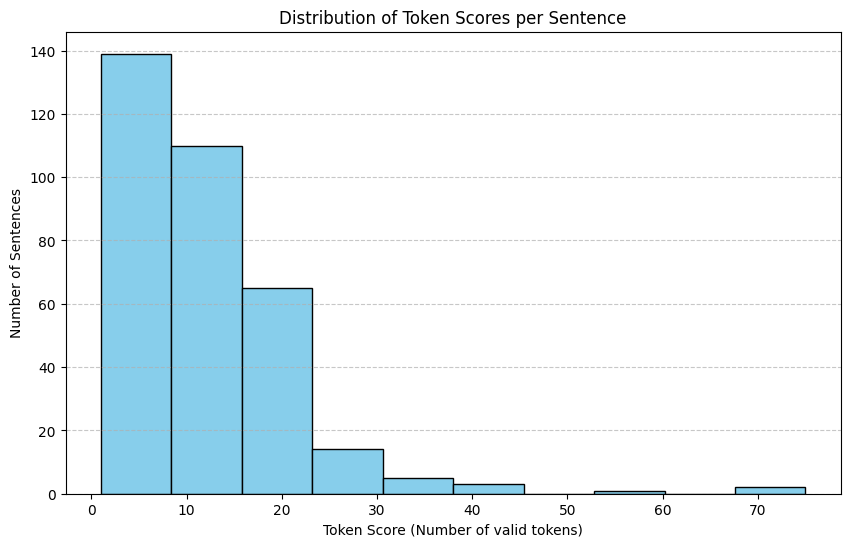

In [ ]:
import matplotlib.pyplot as plt

# Score = number of valid (non-stopword, non-punctuation) tokens per sentence
sentence_scores = []

for sent in doc.sents:
    score = sum(1 for token in sent if not token.is_stop and not token.is_punct)
    sentence_scores.append(score)

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=10, edgecolor='black', color='skyblue')
plt.title("Distribution of Token Scores per Sentence")
plt.xlabel("Token Score (Number of valid tokens)")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Based on the histogram, the most common range of sentence scores is between 5 and 15

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?